In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

# Business Understanding

Diabetes is a chronic condition that affects millions of people worldwide. Managing and predicting diabetes progression can significantly improve patient outcomes and healthcare efficiency. The goal of this analysis is to develop predictive models that can forecast disease progression based on various medical and demographic features. This can help in identifying high-risk patients early and tailoring personalized treatment plans.

## Objectives
1. Understand the relationship between various features and diabetes progression.
2. Build and evaluate multiple regression models to predict diabetes progression.
3. Provide actionable insights based on model findings.

## Data

The diabetes dataset from `sklearn` contains ten baseline variables, all of which are numeric. Here's a brief description of each feature:

1. **age:** Age of the patient (normalized to have mean 0 and variance 1).

2. **sex:** Sex of the patient.

3. **bmi:** Body Mass Index (BMI), a measure of body fat based on height and weight (normalized to have mean 0 and variance 1).

4. **bp:** Average blood pressure (normalized to have mean 0 and variance 1).

5. **s1:** T-Cells (a type of white blood cell), measured using thymidine kinase (normalized to have mean 0 and variance 1).

6. **s2:** Low-Density Lipoproteins (LDL) cholesterol (normalized to have mean 0 and variance 1).

7. **s3:** High-Density Lipoproteins (HDL) cholesterol (normalized to have mean 0 and variance 1).

8. **s4:** Total cholesterol/HDL ratio (normalized to have mean 0 and variance 1).

9. **s5:** Logarithm of serum triglycerides level (normalized to have mean 0 and variance 1).

10. **s6:** Blood sugar level (normalized to have mean 0 and variance 1).

The column **`target`** contains the target variable, which represents the measure of disease progression after one year.

More info on this dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [80]:
# Load the dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Exploratory Data Analysis (EDA)

Besides the EDAs shown below. What others would you do? What actions will you take based on these findings?

In [81]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [82]:
# Display descriptive statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [83]:
# Check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

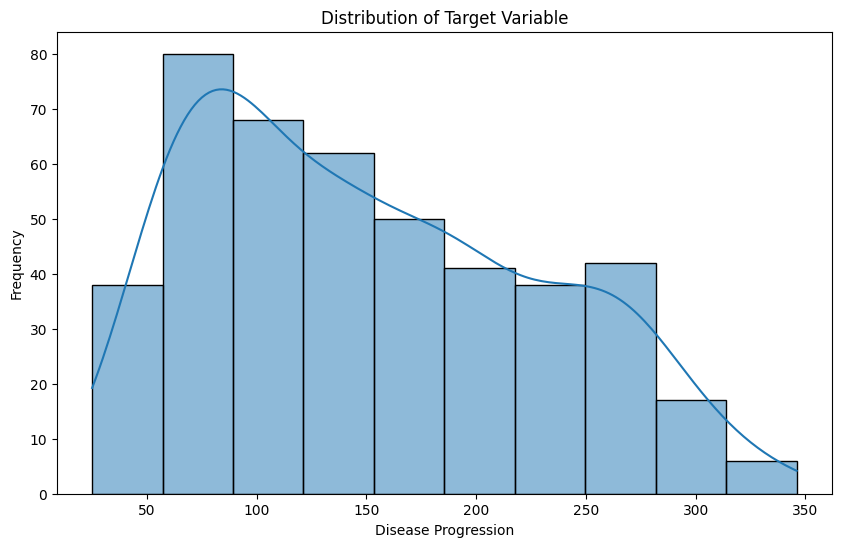

In [84]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

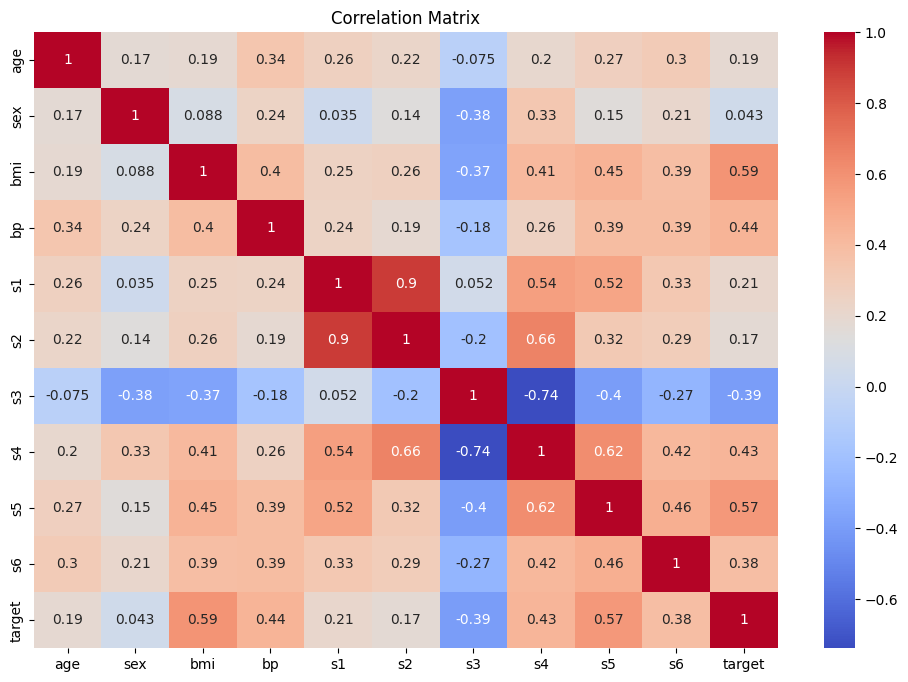

In [85]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

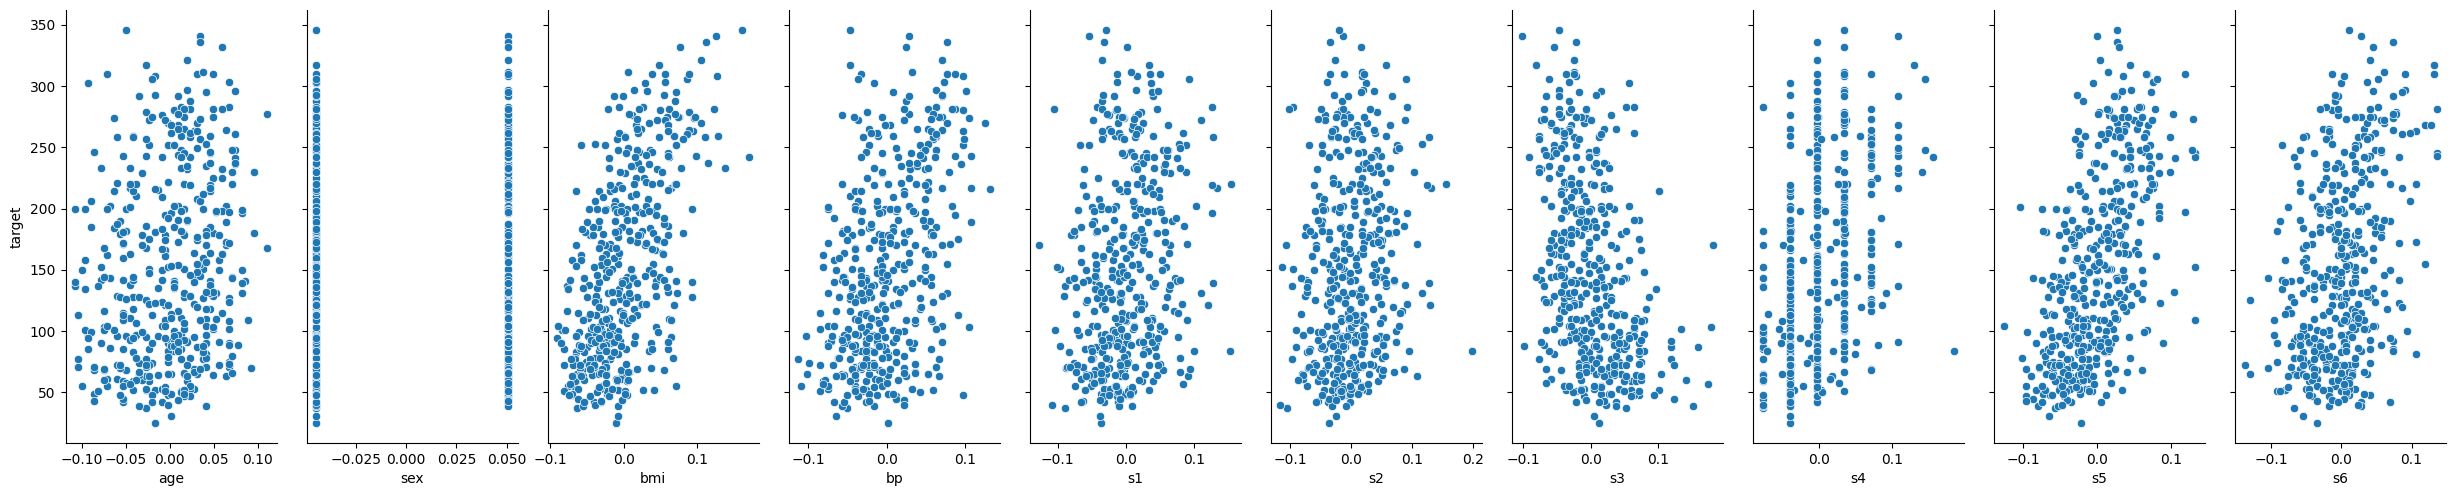

In [86]:
# Visualize relationships between features and target
sns.pairplot(df, x_vars=data.feature_names, y_vars='target', height=5, aspect=0.5)
plt.show()

# 🛁 Data cleaning

Included but not limited to:
- Handling missing values: drop them or account for them
- Handling outliers: drop them or account for them or keep them
- Remove duplicates
- Handling incorrect data types
- Handling inconsistent data (example: age shouldn't be negative)


# Split dataset into train, test

### **ALWAYS** before feature engineering and modeling

The primary reason for performing a train/test split before feature engineering and modeling is to prevent data leakage and to ensure that the evaluation of your model is accurate and indicative of its performance on unseen data.

- Prevention of Data Leakage
- Accurate Evaluation
- Ethical Modeling Practices

In [87]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature engineering

Included but not limited to:
- Handling categorical attributes
  - Ordinal encoder: Assumes two nearby values are more similar to each other
  - One-Hot encoder: One binary category per attribute
- Custom feature engineering
- Feature scaling
  - MinMax
  - Standarization


In this dataset, all features given are already normalized, so no need to do feature engingeering.

# Machine Learning modeling -- Regression

In [88]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [89]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 53.8534, R2 = 0.4526
Ridge Regression: RMSE = 55.4745, R2 = 0.4192
Lasso Regression: RMSE = 58.3402, R2 = 0.3576
Elastic Net Regression: RMSE = 72.8781, R2 = -0.0025


Linear Regression has the best performance among the four models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics.

- **`RMSE (Root Mean Squared Error) = 53.8534`**: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 53.85 units from the actual values of diabetes progression.

- **`R2 (R-squared) = 0.4526`**: This value indicates that approximately 45.26% of the variance in the target variable (disease progression) is explained by the features in the model. While this is a moderate level of explanation, it also indicates that there is still a significant amount of unexplained variance, suggesting room for model improvement.

# Cross Validation and Hyperparameter Tuning

In [90]:
# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 55.9721
Best Ridge: {'alpha': 0.1}, RMSE = 55.9034
Best Lasso: {'alpha': 0.1}, RMSE = 55.9365
Best ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}, RMSE = 56.6555

Evaluate the best models on the test set
Linear Regression: RMSE = 53.8534, R2 = 0.4526
Ridge: RMSE = 53.4461, R2 = 0.4609
Lasso: RMSE = 52.8980, R2 = 0.4719
ElasticNet: RMSE = 53.6408, R2 = 0.4569


The performance remains unchanged as expected since Linear Regression does not have hyperparameters to tune. It serves as a baseline for comparison.

Based on the post-tuning metrics, Lasso Regression is the best performing model with the lowest RMSE and highest R2 score, making it the preferred choice for predicting diabetes progression in this context.

# Lasso model - Final performance metrics and model interpretation
Given the results of the previous section, we'll proceed with the best Lasso model for further analysis.

Lasso Regression has the best performance after GridSearchCV among all the models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics.

- **`RMSE (Root Mean Squared Error) = 52.8980`**: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 52.90 units from the actual values of diabetes progression.

- **`R2 (R-squared) = 0.4719`**: This value indicates that approximately 47.19% of the variance in the target variable (disease progression) is explained by the features in the model. While this is a moderate level of explanation, it also indicates that there is still a significant amount of unexplained variance, suggesting room for model improvement.

In [91]:
# Use the best Lasso model to make predictions
best_lasso_model = best_models['Lasso']
y_pred = best_lasso_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
287,219.0,149.907975
211,70.0,176.544419
72,202.0,153.892439
321,230.0,270.254170
73,111.0,127.797552


### Interpret the Coefficients and Y-Intercept

Lasso regression provides the coefficients of the features and the intercept. These values help us understand the relationship between each feature and the target variable. However, due to the L1 regularization, some coefficients may be zero, indicating that the feature is not used in the model.

In [92]:
# Get the coefficients and the intercept from the best Lasso model
coefficients = pd.Series(best_lasso_model.coef_, index=X_train.columns)
intercept = best_lasso_model.intercept_

print("Lasso Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Lasso Regression Coefficients:
age      0.000000
sex   -152.664779
bmi    552.697775
bp     303.365158
s1     -81.365007
s2      -0.000000
s3    -229.255776
s4       0.000000
s5     447.919525
s6      29.642617
dtype: float64

Intercept: 151.57485282893947


In general:
- **Coefficient Value:** The value of each coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.
- **Intercept:** The intercept represents the expected value of the target variable when all features are zero.

### Specific Interpretation for the Diabetes Dataset

1. **age, s2, and s4 all being zero**

The coefficients for age, s2 (LDL cholesterol), and s4 (total cholesterol/HDL ratio) are zero, indicating that they do not contribute to the model. Lasso has excluded these features, suggesting it is not important for predicting diabetes progression in this dataset.

2. **sex: -152.664779**

For a unit increase in the sex variable, the expected change in the target variable (disease progression) is a decrease of 152.66 units. This suggests that sex has a significant negative impact on diabetes progression. In the context of this dataset, this might mean that being male (if coded as 1) is associated with a lower progression rate.

3. **bmi: 552.697775**

For a unit increase in BMI, the expected increase in the target variable is 552.70 units. This indicates a strong positive relationship between BMI and diabetes progression, meaning that higher body fat is associated with greater disease progression.

4. **bp: 303.365158**

For a unit increase in blood pressure, the expected increase in the target variable is 303.37 units. This suggests that higher blood pressure is associated with greater disease progression.

5. **s1: -81.365007**

For a unit increase in the s1 feature (T-Cells--measured using thymidine kinase), the expected decrease in the target variable is 81.37 units. This indicates a negative relationship between T-Cells and diabetes progression, implying that higher levels of T-Cells are associated with lower disease progression.

7. **s3: -229.255776**

For a unit increase in the s3 feature (HDL cholesterol), the expected decrease in the target variable is 229.26 units. This suggests a negative relationship between HDL cholesterol and diabetes progression, implying that higher levels of HDL cholesterol are associated with lower disease progression.

9. **s5: 447.919525**

For a unit increase in the s5 feature (log of serum triglycerides), the expected increase in the target variable is 447.92 units. This indicates a strong positive relationship between serum triglycerides and diabetes progression.

10. **s6: 29.642617**

For a unit increase in the s6 feature (blood sugar level), the expected increase in the target variable is 29.64 units. This suggests a positive relationship between blood sugar level and diabetes progression.

11. **Intercept: 151.57485282893947**

When all features are zero, the expected value of the target variable (disease progression) is 151.57 units. The intercept represents the baseline level of disease progression when all predictors are at their reference levels.

## Plot the results

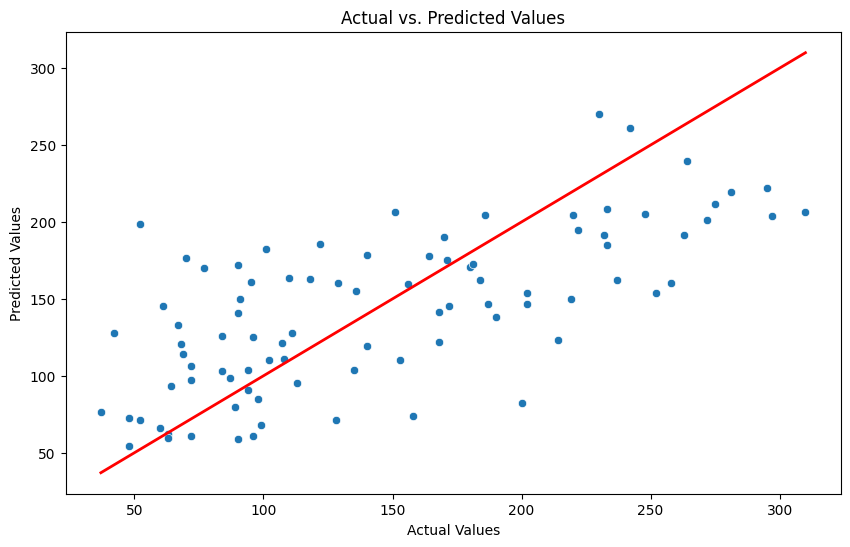

In [93]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Each point on the scatter plot represents a single observation from the test set. The position of each point shows the actual value (x-coordinate) and the predicted value (y-coordinate) for that observation.

The red line represents the line of perfect prediction, where the predicted values exactly match the actual values (y = x).
Points on this line indicate perfect predictions by the model.


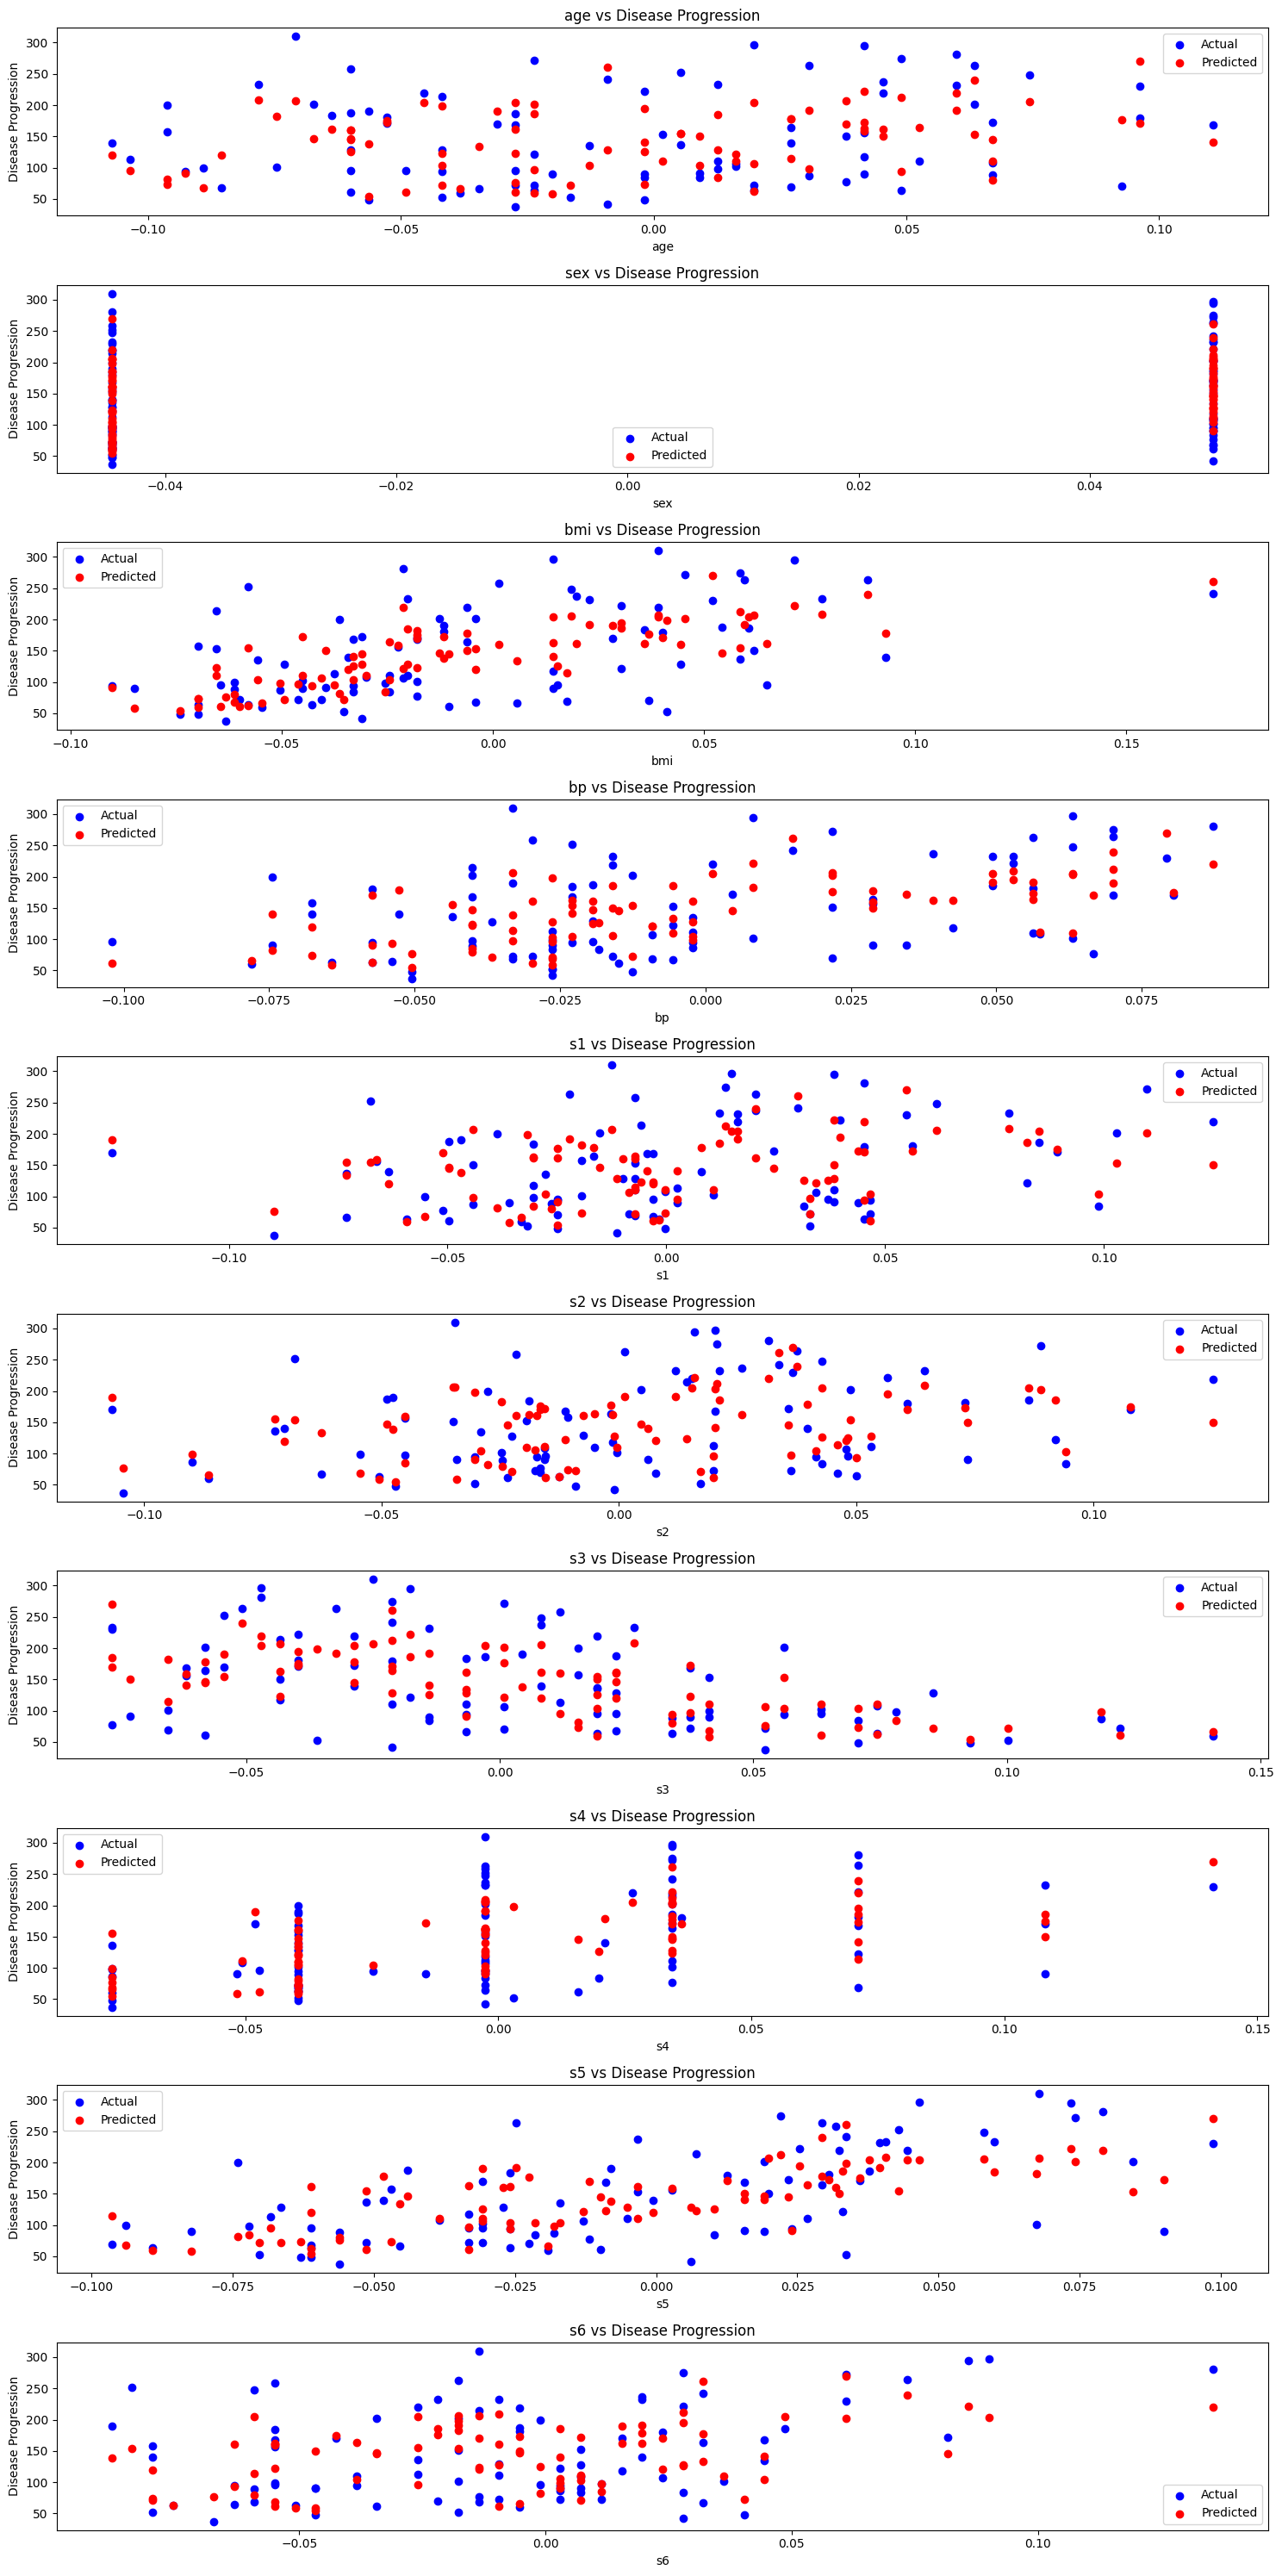

In [94]:
import matplotlib.pyplot as plt

# Get the selected features from the model
selected_features = coefficients.index

# Create scatter plots for each selected feature against the target variable
plt.figure(figsize=(15, 30))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual')
    plt.scatter(X_test[feature], y_pred, color='red', label='Predicted')
    plt.xlabel(f'{feature}')
    plt.ylabel('Disease Progression')
    plt.title(f'{feature} vs Disease Progression')
    plt.legend()

plt.tight_layout()
plt.show()


# Conclusions

### Business Understanding Recap

Diabetes is a chronic condition that affects millions of people worldwide. Managing and predicting diabetes progression can significantly improve patient outcomes and healthcare efficiency. The goal of this analysis is to develop predictive models that can forecast disease progression based on various medical and demographic features. This can help in identifying high-risk patients early and tailoring personalized treatment plans.

### Interesting Findings

| Feature                                 | Recommendation                                                                                     | Coefficient Value | Impact               | Interpretation                                                                                  |
|-----------------------------------------|--------------------------------------------------------------------------------------------------|-------------------|----------------------|-------------------------------------------------------------------------------------------------|
| Body Mass Index (BMI)                   | Implement and encourage weight management programs to reduce BMI.                                | 552.697775        | Strong positive      | Higher BMI is strongly associated with increased diabetes progression.                          |
| Serum Triglycerides (s5)                | Advocate for dietary changes that lower triglyceride levels, such as reducing sugar intake.       | 447.919525        | Strong positive      | Higher serum triglycerides levels are associated with increased diabetes progression.            |
| Blood Pressure (BP)                     | Encourage regular blood pressure monitoring and provide resources for managing high blood pressure. | 303.365158        | Significant positive | Higher blood pressure is associated with increased diabetes progression.                        |
| High-Density Lipoproteins (HDL) Cholesterol (s3) | Encourage diets rich in healthy fats to increase HDL levels.                                      | -229.255776       | Strong negative      | Higher HDL cholesterol levels are associated with decreased diabetes progression.                |
| Sex                                     | Develop personalized treatment plans that consider the patient’s sex.                            | -152.664779       | Significant negative | Differential impact based on sex, with higher values (likely males) associated with lower progression. |
| T-Cells (s1)                            | Focus on treatments and interventions that may boost T-Cells levels if applicable.                | -81.365007        | Moderate negative    | Higher levels of T-Cells are associated with decreased diabetes progression.                    |
| Blood Sugar Level (s6)                  | Provide education on managing blood sugar levels and ensure regular monitoring.                   | 29.642617         | Positive             | Higher blood sugar levels are associated with increased diabetes progression.                    |
| Age                                     | No specific recommendation needed based on this feature.                                          | 0.000000          | None                 | Age does not contribute to predicting diabetes progression.                                      |
| Low-Density Lipoproteins (LDL) Cholesterol (s2) | No specific recommendation needed based on this feature.                                          | 0.000000          | None                 | LDL cholesterol does not contribute to predicting diabetes progression.                          |
| Total Cholesterol/HDL Ratio (s4)        | No specific recommendation needed based on this feature.                                          | 0.000000          | None                 | The total cholesterol/HDL ratio does not contribute to predicting diabetes progression.          |


### Actionable insights

- **Weight Management Programs:** Develop and promote programs focused on weight management, such as nutrition counseling, exercise regimes, and support groups to help reduce BMI.

- **Blood Pressure Monitoring**: Encourage regular blood pressure check-ups and provide resources for managing high blood pressure through lifestyle changes and medication.

- **Personalized Care:** Develop personalized treatment plans that consider the patient’s sex to optimize care and manage diabetes progression more effectively.

- **Diet and Lifestyle Adjustments:** Encourage diets rich in healthy fats, such as those found in fish, nuts, and olive oil, to increase HDL cholesterol levels. Advocate for dietary changes that lower triglyceride levels, such as reducing sugar and refined carbohydrates intake.

- **Blood Sugar Control, Education and Tools:** Provide patients with education on managing blood sugar levels, including the use of glucometers and adherence to medication.


# Deployment/Implementation

To deploy and implement the Lasso regression model in a real-world scenario, we need to cover the following steps:

1. Save the trained model to a file for future use.
2. Load the saved model and use it to make predictions on new data.
3. Implement a function that takes new patient data and returns the predicted diabetes progression.
4. Use a web framework like Flask or a dashboarding tool like Tableau to create an API endpoint that serves predictions.

In [95]:
import joblib

# Save the trained Lasso model to a file
model_filename = 'lasso_diabetes_model.pkl'
joblib.dump(best_lasso_model, model_filename)

['lasso_diabetes_model.pkl']

In [96]:
# Load the saved Lasso model
loaded_model = joblib.load(model_filename)

In [100]:
def predict_diabetes_progression(model, input_data):
    """
    Predict diabetes progression using the trained Lasso model.

    Parameters:
    - model: Trained Lasso model
    - input_data: Dictionary containing the input features for the new data

    Returns:
    - predicted_values: Predicted diabetes progression values
    """
    # Convert input data to DataFrame
    input_data_df = pd.DataFrame(input_data)

    # Ensure input data has the same columns as the training data
    input_data_df = input_data_df[X_train.columns]

    # Make predictions
    predicted_values = model.predict(input_data_df)

    return predicted_values

In [101]:
# Sample input data for a new patient
new_patient_data = {
    'age': [0.038076],
    'sex': [0.050680],
    'bmi': [0.061696],
    'bp': [0.021872],
    's1': [-0.044223],
    's2': [-0.034821],
    's3': [-0.043400],
    's4': [-0.002592],
    's5': [0.019907],
    's6': [-0.017646]
}

# Convert the sample input data to a DataFrame
new_patient_df = pd.DataFrame(new_patient_data)
new_patient_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.0434,-0.002592,0.019907,-0.017646


In [102]:
# Get the prediction for the new patient data
new_patient_prediction = predict_diabetes_progression(loaded_model, new_patient_df)

# Print the prediction result
print("Predicted diabetes progression for the new patient:", new_patient_prediction[0])

Predicted diabetes progression for the new patient: 206.51381224672127


The predicted value represents the expected measure of diabetes progression for the new patient over one year. This prediction is generated by the trained Lasso regression model, which has been tuned and validated to forecast disease progression using various features from the patient's profile.

206.51 is a moderate-to-high score, suggesting that the patient may experience noticeable progression in their diabetes condition if current trends continue.

Patients with higher predicted progression scores can be flagged for more intensive management and follow-up. This helps prioritize resources and attention for those at greater risk.

### Use the pkl file and the function above to deploy your machine learning model to make predictions.

Additional implementation steps:
- Model monitoring
- Versioning
- Security
- CI/CD
- Scaling (Kubernetes/ AWS ECS)
- User interface (Dash, React, Flutter)